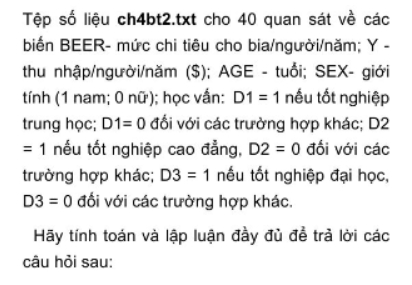

In [2]:
library(ggplot2)
library(lmtest)
library(urca)
library(sandwich)
library(car)
library(carData)
library(forecast)
library(tseries)
library(dummy)
library(seasonal)
library(hexView)
library(strucchange)
library(fBasics)

In [ ]:
df <- read.table("ch4bt2.txt",header = TRUE)

Câu 1

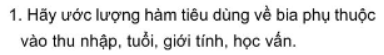

In [ ]:
hq <- lm(data = df,BEER~Y+AGE+SEX+D2+D3)
summary(hq)

Câu 2

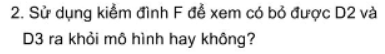

In [ ]:
linearHypothesis(hq,c("D2=0","D3=0"))

Câu 3

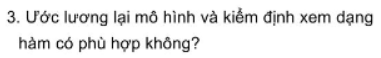

In [ ]:
resettest(hq, power = c(2,3))

Câu 4

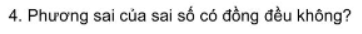

In [ ]:
df$phandu <- residual(hq)
summary(lm(data = df, phandu ~ Y+AGE+SEX+I(Y^2)+I(AGE^2)+I(SEX^2)))

Câu 5



In [ ]:
jarqueberaTest(hq$residuals)

Câu 6

Câu 7 

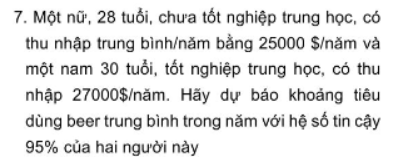